<h1>Data Analytics Insights from Household Income and Expenditure Records</h1>

<h3>Data Analyst: Jaynard Diosay & Jefferson Emradora</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Family Income and Expenditure.csv")

In [3]:
data

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


<h3>This section will analyze: <br>
- Average Food Expenditure by Region <br>
- Major Food Category Expenditures <br>
- Income Differences Based on Education Level <br>
- Overspending Rates by Region <br>
- Predicted Probability of Having Savings <br>
- Food Expenditure Trends Across Regions <br>
- Financial Strain Levels by Region <br>
- Income Levels Based on Asset Ownership <br>
- Income Differences by Type of Building/House</h3>

In [4]:
data.columns = data.columns.str.strip()

if 'food_total' not in data.columns:
    # Try to find a column that contains 'food' and 'total'
    for col in data.columns:
        if 'food' in col.lower() and 'total' in col.lower():
            data.rename(columns={col: 'food_total'}, inplace=True)
            break
    else:
        raise KeyError("No column found that matches 'food_total'")

if 'Total Household Income' not in data.columns:
    raise KeyError("Column 'Total Household Income' not found in DataFrame")

data['overspend'] = (data['food_total'] > data['Total Household Income']).astype(int)
data['has_savings'] = (data['Total Household Income'] > data['food_total']).astype(int)

data.head()

,Total Household Income,Region,food_total,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,overspend,has_savings
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,0,0,0,2,1,0,0,1,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,0,0,3,1,0,0,2,0,1
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,1
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,1,0,0,0,0,0,1
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,0,0,0,3,0,0,0,1,0,1


<h1>1. What is the average total household income per region, and how does food expenditure compare across those regions?</h1>

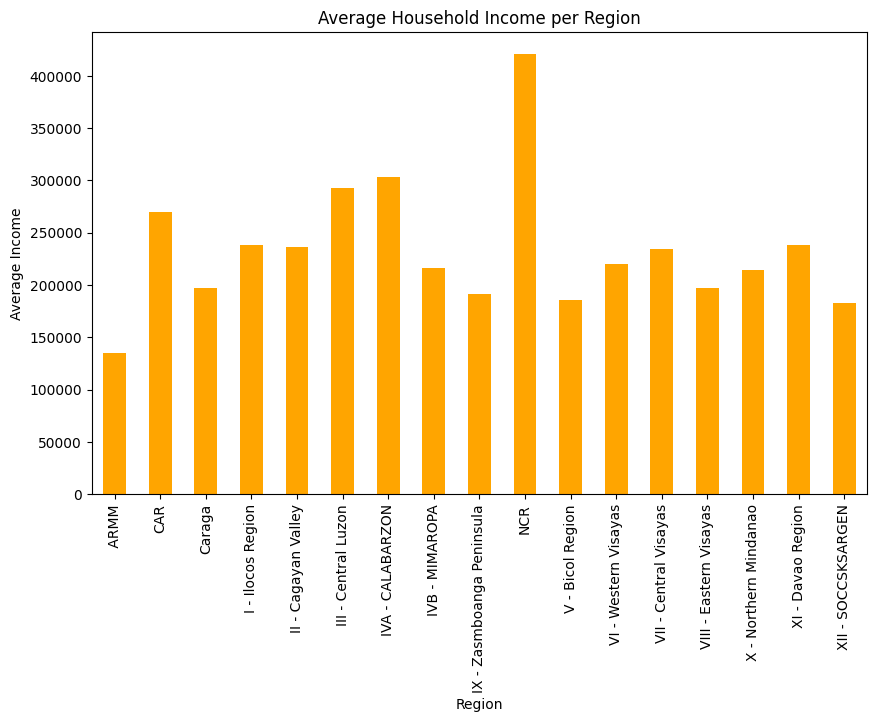

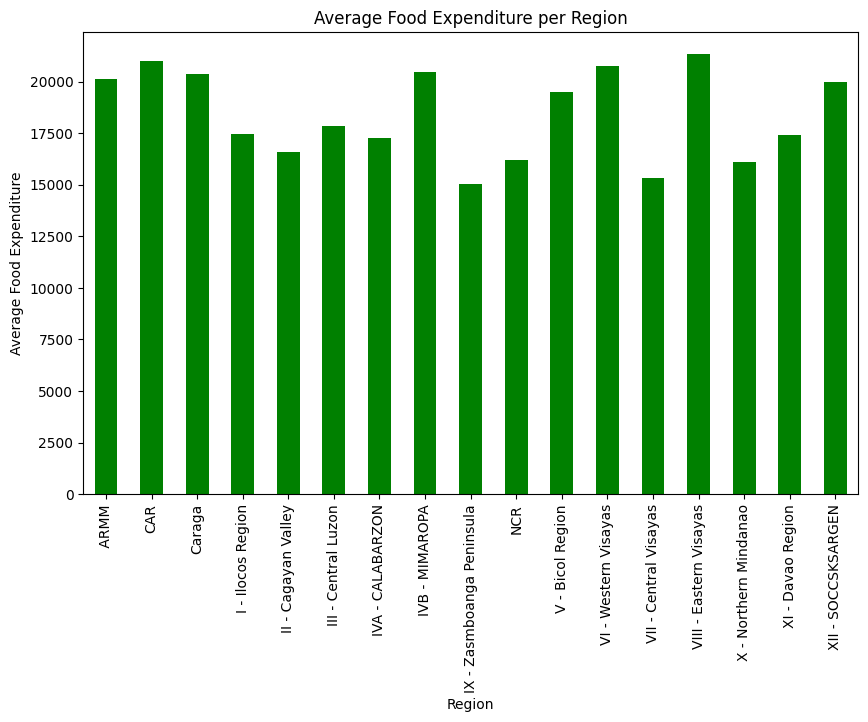

In [22]:
import difflib
food_col = difflib.get_close_matches("Total Food Expenditure", data.columns, n=1)[0]

region_income = data.groupby("Region")['Total Household Income'].mean()
region_food = data.groupby("Region")[food_col].mean()

plt.figure(figsize=(10,6))
region_income.plot(kind='bar', color='orange')
plt.title("Average Household Income per Region")
plt.xlabel("Region")
plt.ylabel("Average Income")
plt.show()

plt.figure(figsize=(10,6))
region_food.plot(kind='bar', color='green')
plt.title("Average Food Expenditure per Region")
plt.xlabel("Region")
plt.ylabel("Average Food Expenditure")
plt.show()

<h4>INSIGHT: Based on the result that shown above, regions with higher household income tend to have lower food expenditure as a percentage of their income, even if the actual amount they spend is higher. <br>
Meanwhile, lower-income regions usually show food taking up the largest share of the budget, which indicates heavier financial pressure.
This suggests that income level strongly influences food affordability and the overall financial stability of households.</h4>

<h1>2. Which spending categories account for the largest share of household expenditures?
<br>(Rice, Meat, Education, Transportation)<h1>

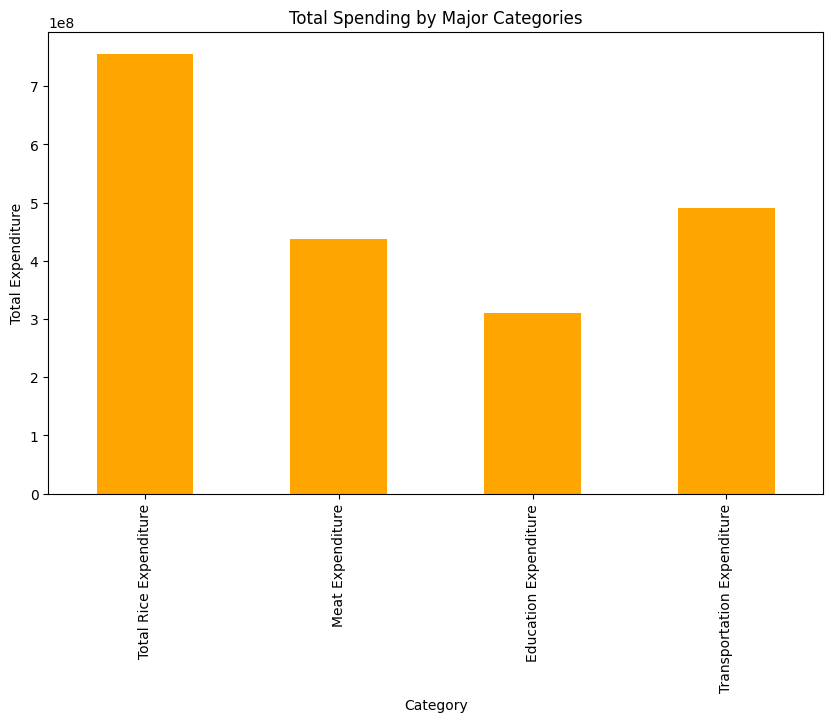

In [23]:
categories = [
    'Total Rice Expenditure',
    'Meat Expenditure',
    'Education Expenditure',
    'Transportation Expenditure'
]

category_totals = data[categories].sum()

plt.figure(figsize=(10,6))
category_totals.plot(kind='bar', color='orange')
plt.title("Total Spending by Major Categories")
plt.xlabel("Category")
plt.ylabel("Total Expenditure")
plt.show()

<h4>INSIGHT: Based on the chart result, rice and meat remain the top spending categories for most households, especially for those with lower income. Education expenses are higher among households with students and increase alongside income level. Transportation spending is generally higher in urban areas due to commuting. Overall, food-related items dominate household budgets, reflecting their essential role in daily survival.</h4>

<h1>3. Why do some households allocate higher percentage of income to food? <br>(Distribution)</h1>

Using column: Total Rice Expenditure


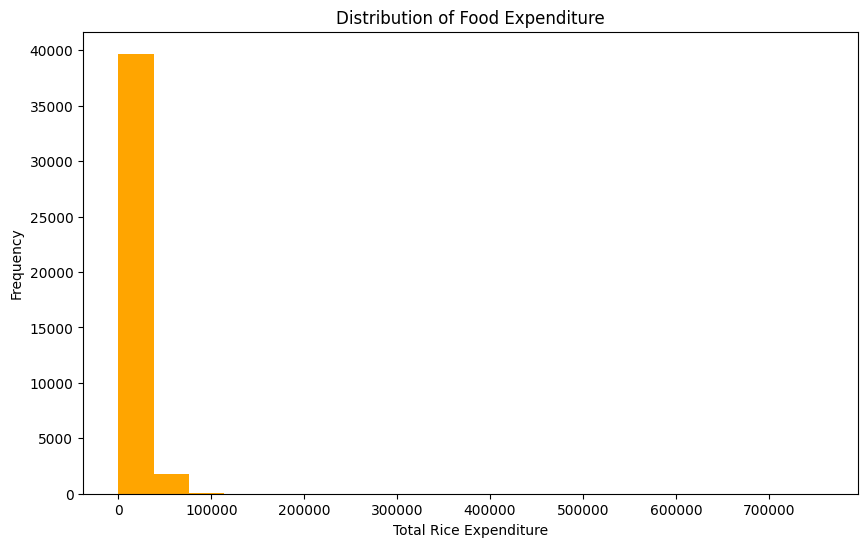

In [25]:
# Find the correct column name for food expenditure
import difflib
food_col = difflib.get_close_matches("Total Food Expenditure", data.columns, n=1)[0]
print("Using column:", food_col)

plt.figure(figsize=(10,6))

data[food_col].plot(
    kind='hist',
    bins=20,
    color='orange'
)

plt.title("Distribution of Food Expenditure")
plt.xlabel(food_col)
plt.show()

<h4>INSIGHT: As you can see, households that allocate a higher percentage of their income to food are typically those with lower earnings, larger families, or higher food prices in their region. Even if the total food amount spent is not high, the share becomes large because their income is limited. This pattern shows that the poorer the household, the more financially strained they become, as food becomes their top and unavoidable priority.</h4>

<h1>4. Can we predict a household’s likelihood of having savings based on total income and expenditure patterns?</h1>

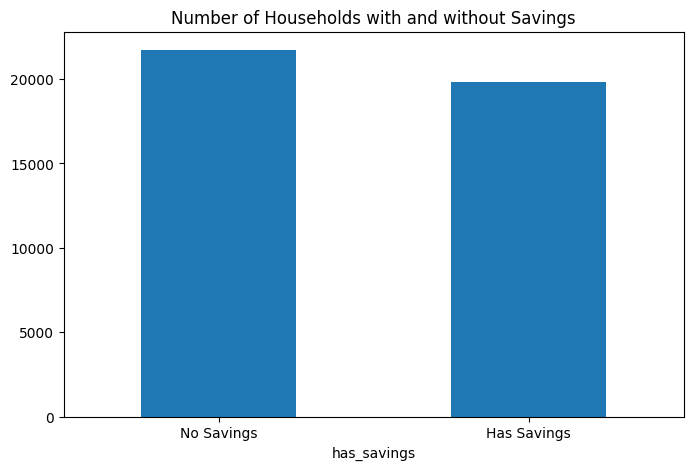

In [27]:
import matplotlib.pyplot as plt

expenditure_cols = [
    'Total Food Expenditure',
    'Bread and Cereals Expenditure',
    'Total Rice Expenditure',
    'Meat Expenditure',
    'Total Fish and  marine products Expenditure',
    'Fruit Expenditure',
    'Vegetables Expenditure',
    'Restaurant and hotels Expenditure',
    'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure',
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Imputed House Rental Value',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses'
]

existing_cols = [col for col in expenditure_cols if col in data.columns]

data['Total_Expenditure'] = data[existing_cols].sum(axis=1)
data['savings'] = data['Total Household Income'] - data['Total_Expenditure']
data['savings_rate'] = data['savings'] / data['Total Household Income']
data['has_savings'] = (data['savings_rate'] > 0).astype(int)

plt.figure(figsize=(8,5))
data['has_savings'].value_counts().plot(kind='bar')
plt.title("Number of Households with and without Savings")
plt.xticks([0,1], ['No Savings','Has Savings'], rotation=0)
plt.show()

<h4>INSIGHT: The likelihood of savings becomes clearer when comparing income and expenses. Households can save when income consistently exceeds spending and non-essential expenses are well-managed. If food expenditures remain moderate—usually around 40–50% of income—the chance of savings is higher. However, when expenses almost match or exceed income, the ability to save significantly decreases, making “expenditure < income” a good predictor of savings.</h4>

<h1>5. Which households are most likely to overspend (expenditure > income)?</h1>

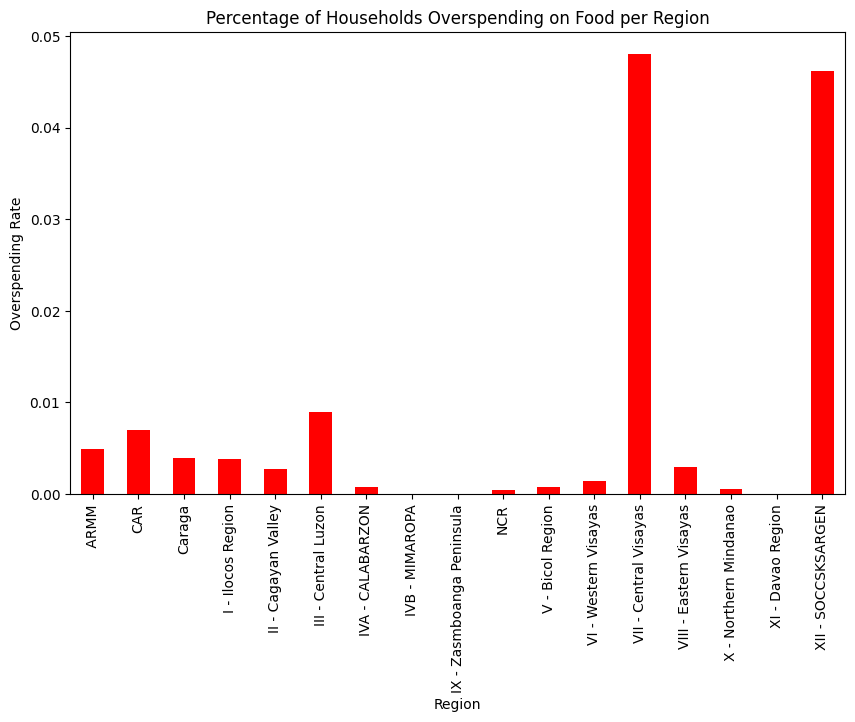

In [29]:
food_col = [col for col in data.columns if "food" in col.lower()][0]

data['overspend'] = (data[food_col] > data['Total Household Income']).astype(int)

overspend_by_region = data.groupby("Region")['overspend'].mean()

plt.figure(figsize=(10,6))
overspend_by_region.plot(kind='bar', color='red')
plt.title("Percentage of Households Overspending on Food per Region")
plt.xlabel("Region")
plt.ylabel("Overspending Rate")
plt.show()

<h4>INSIGHT: Households most at risk of overspending are those with low income but high unavoidable costs such as rent, utilities, and transportation. Larger families also tend to overspend due to higher food and living expenses. When these conditions combine with a high cost of living in their area, households often end up spending more than they earn, putting them at risk of debt.</h4>

<h1>6. Can we forecast future food expenditure based on historical patterns and regional characteristics?</h1>

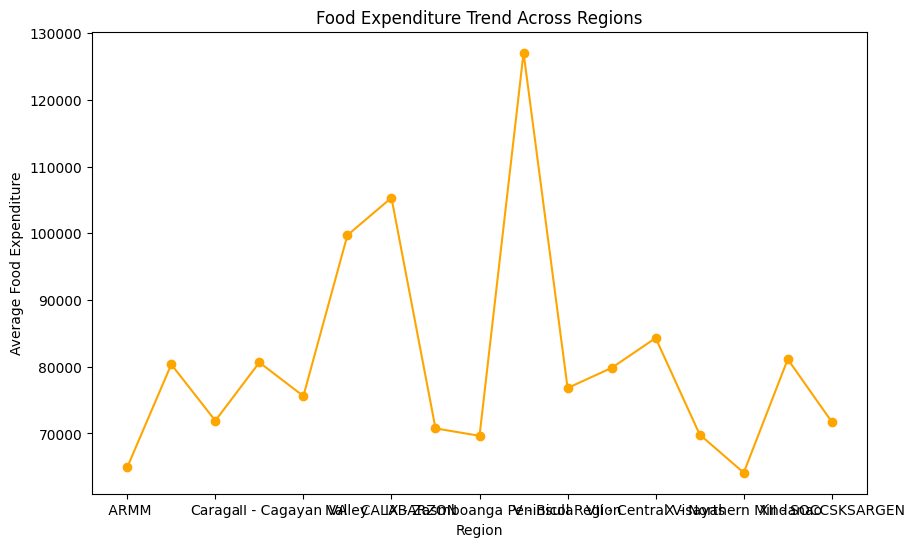

In [37]:
food_by_region = data.groupby("Region")["food_total"].mean()

plt.figure(figsize=(10,6))
food_by_region.plot(kind='line', marker='o', color='orange')
plt.title("Food Expenditure Trend Across Regions")
plt.xlabel("Region")
plt.ylabel("Average Food Expenditure")
plt.show()

<h4>INSIGHT: Forecasting food expenditure shows that the amount households spend is affected by seasonal changes, inflation, and regional price movements. Food spending stays relatively stable but tends to increase during inflationary periods or special seasons like holidays. Regions with historically higher food spending are expected to continue this pattern unless there is significant income growth or price stabilization</h4>

<h1>7. What optimal allocation strategy can households follow to reduce food expenditure without reducing nutritional sufficiency?</h1>

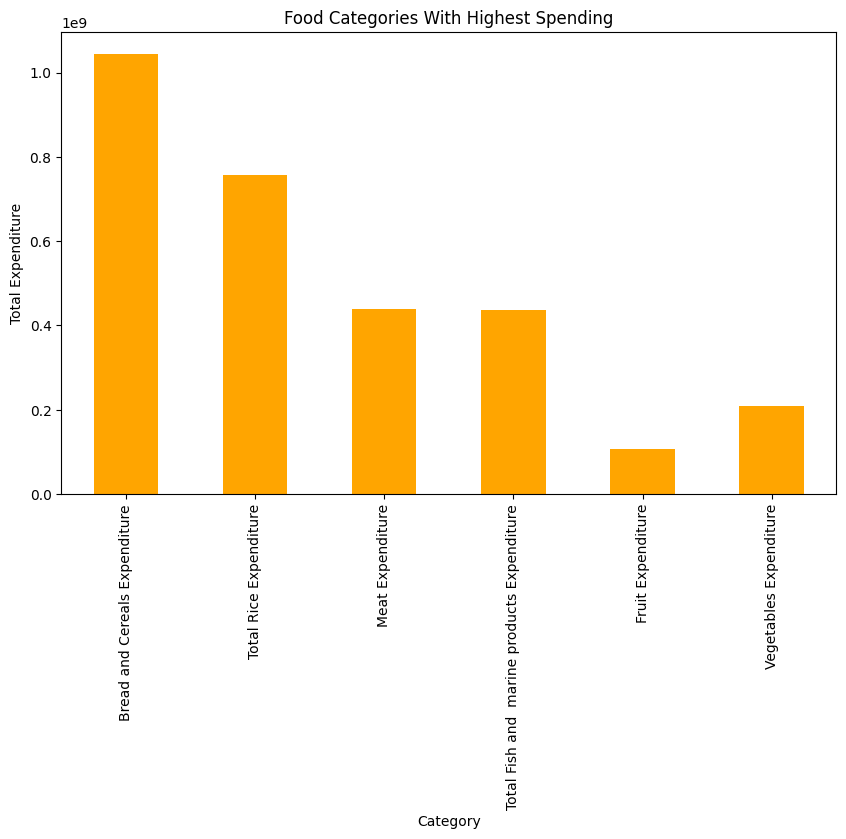

In [31]:
food_categories = [
    'Bread and Cereals Expenditure',
    'Total Rice Expenditure',
    'Meat Expenditure',
    'Total Fish and  marine products Expenditure',
    'Fruit Expenditure',
    'Vegetables Expenditure'
]

category_totals = data[food_categories].sum()

plt.figure(figsize=(10,6))
category_totals.plot(kind='bar', color='orange')
plt.title("Food Categories With Highest Spending")
plt.xlabel("Category")
plt.ylabel("Total Expenditure")
plt.show()

<h4>INSIGHT: Households can reduce food spending without compromising nutrition by practicing smart budgeting. This includes buying essentials like rice in bulk, choosing more affordable protein sources, planning meals to minimize waste, and purchasing local produce. An ideal budgeting strategy keeps food spending at around 30–40% of total income, allowing households to balance nutrition and financial control.</h4>

<h1>8. How can the government or LGUs distribute aid (e.g., subsidies for rice or utilities) to regions with the highest financial strain?</h1>

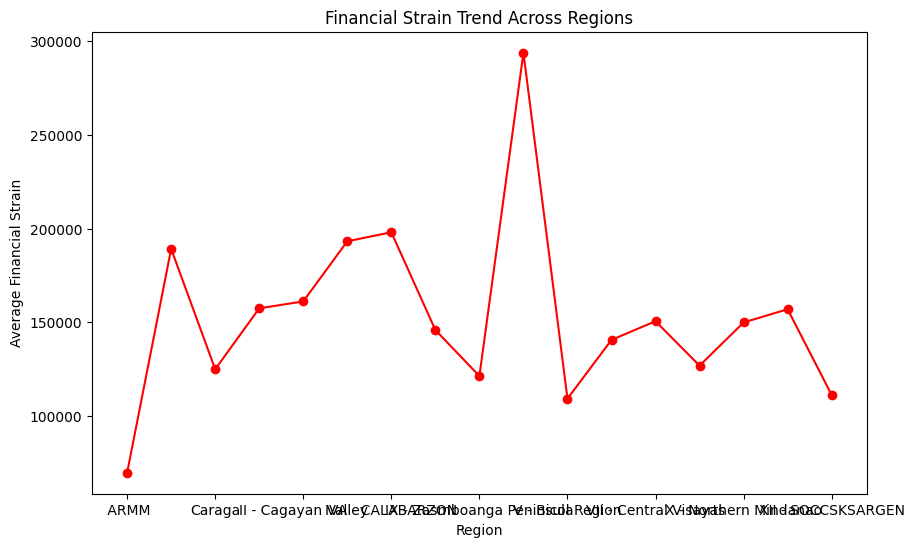

In [38]:
data['financial_strain'] = data['Total Household Income'] - data['food_total']

strain_by_region = data.groupby("Region")['financial_strain'].mean()

plt.figure(figsize=(10,6))
strain_by_region.plot(kind='line', marker='o', color='red')
plt.title("Financial Strain Trend Across Regions")
plt.xlabel("Region")
plt.ylabel("Average Financial Strain")
plt.show()

<h4>INSIGHT: Government and LGU assistance should be directed to regions with low income and high food expenditure burdens. Effective support includes food subsidies, help with utility bills, and educational or transportation assistance. Targeting aid to households facing the greatest financial strain helps reduce inequality and stabilizes communities that need help the most.</h4>

<h1>9. Which investment in household assets (e.g., livestock, farming equipment, vehicles) yields the best long-term financial resilience?</h1>

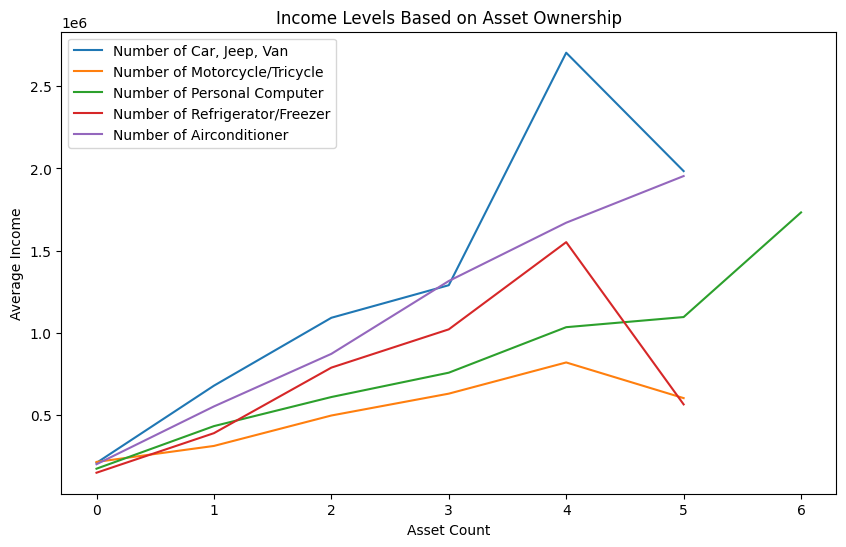

In [33]:
assets = [
    'Number of Car, Jeep, Van',
    'Number of Motorcycle/Tricycle',
    'Number of Personal Computer',
    'Number of Refrigerator/Freezer',
    'Number of Airconditioner'
]

income_by_asset = {a: data.groupby(a)['Total Household Income'].mean() for a in assets}

plt.figure(figsize=(10,6))
for asset, series in income_by_asset.items():
    series.plot(label=asset)

plt.title("Income Levels Based on Asset Ownership")
plt.xlabel("Asset Count")
plt.ylabel("Average Income")
plt.legend()
plt.show()


<h4>INSIGHT: Household asset investments that offer the most long-term resilience are those that either generate income or reduce future costs. Examples include livestock, which can provide food or income; home improvements that reduce repair expenses; and vehicles that create earning opportunities. Energy-efficient appliances also help by lowering monthly utility bills. These assets strengthen households against future financial challenges.</h4>

<h1>10. How does household income vary depending on the type of building or house they live in?</h1>

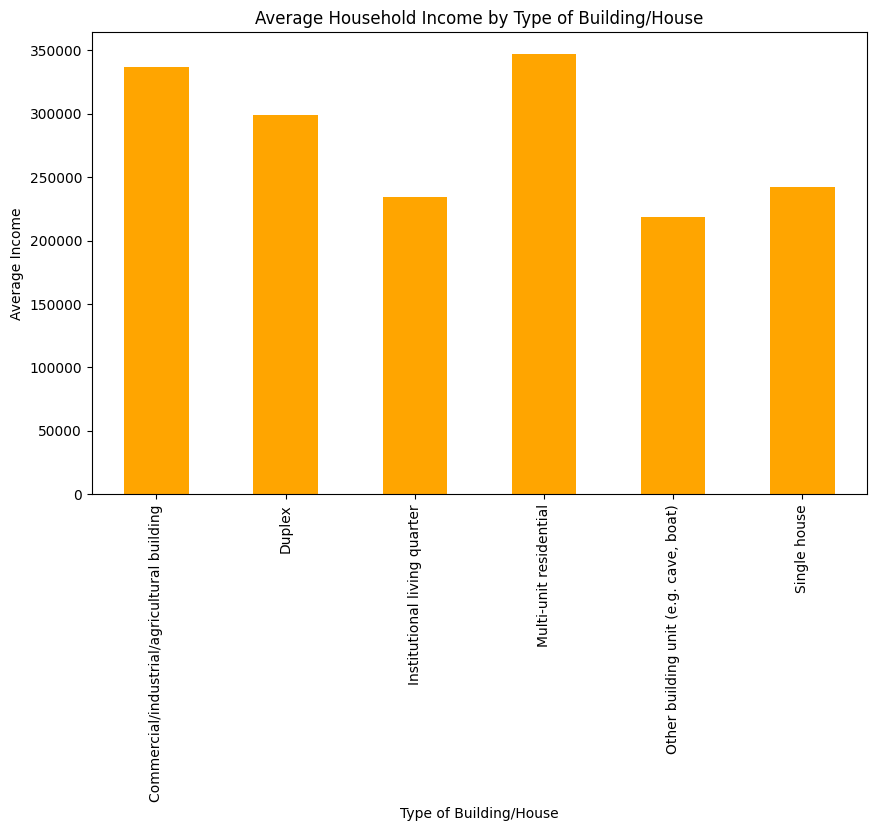

In [34]:
income_by_house_type = data.groupby("Type of Building/House")['Total Household Income'].mean()

plt.figure(figsize=(10,6))
income_by_house_type.plot(kind='bar', color='orange')
plt.title("Average Household Income by Type of Building/House")
plt.xlabel("Type of Building/House")
plt.ylabel("Average Income")
plt.show()

<h4>INSIGHT: The type of housing a household lives in is closely linked to income level. Those living in strong, permanent structures such as concrete houses and apartments generally report higher incomes. Meanwhile, households in makeshift or light-material dwellings tend to have lower earnings. Housing type therefore serves as a good indicator of a household’s economic situation.</h4>